In [3]:
import os
import numpy as np

path = 'D:\One_한양대학교\private object minsu\coding\data\samsung_2024\Preprocessed_Stress'
path_folder = os.path.join(path,'Relax')
datalist = os.listdir(path_folder)

chan_selection = [[0,8],[0,3],[3,6],[6,8]]
chan_mode = 1
data = []
for path_dat in datalist:
    dat = np.load(os.path.join(path_folder, path_dat))[chan_selection[chan_mode][0]:chan_selection[chan_mode][1]]
    data.append(dat)

In [4]:
data[0].shape

(3, 7500)

In [5]:
path = 'D:\One_한양대학교\private object minsu\coding\data\samsung_2024\emotion'
import torch
dat = np.load(path+'/emotion_data.npy')
dat = np.concatenate(dat)
for i in [0, 7500]:
    j = list(torch.from_numpy(dat[:,chan_selection[chan_mode][0]:chan_selection[chan_mode][1],i:i+7500]))
    data += j
i = data[-1]
# for i in range(dat.shape[0]):
#     for j in range(dat.shape[1]):
#         data.append(dat[i,j,:,:7500])
#         data.append(dat[i,j,:,7500:])

In [ ]:
from models.autoencoder_kl import AutoencoderKL
from utils import *
import torch

model_ae = AutoencoderKL(16, 2, 32, 4, 8).to(DEVICE)
model_ae.load_state_dict(torch.load('aekl500.pth'))



1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

a = pd.read_csv('D:\One_한양대학교\private object minsu\coding\data\samsung_2024\\food_preliminary\\ver1\KYS\Food_label_Kys_20250120-0340.csv')
a = pd.read_csv('D:\One_한양대학교\private object minsu\coding\data\samsung_2024\\food_preliminary\\ver2\HWS\Food_label_Hws_20250304-0609.csv')
a = a.to_numpy()[0]
a = [sum(a==x) for x in range(1,6)]
a, sum(a)

([14, 21, 33, 52, 39], 159)

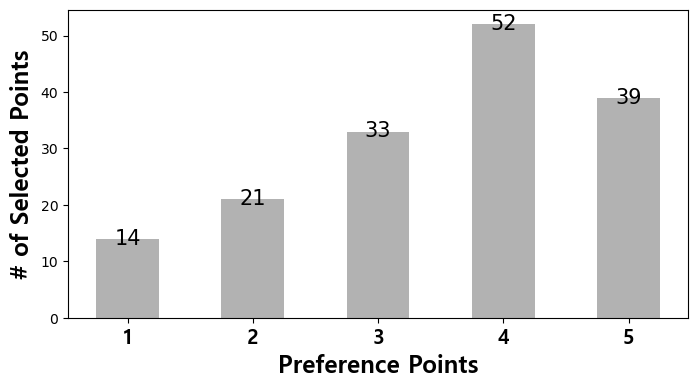

In [2]:
plt.figure(figsize=(8,4))
plt.bar(np.arange(0,5,1), a, 0.5, color=(0.5, 0.5, 0.5, 0.6))
plt.xticks(np.arange(0,5,1), np.arange(1,6,1), fontweight='bold', fontsize='x-large', fontfamily='Malgun Gothic')
# plt.yticks(np.arange(0,15,1), fontweight='semibold',fontsize='x-large', fontfamily='Malgun Gothic')
plt.ylabel("# of Selected Points", fontsize='xx-large', fontweight='bold', fontfamily='Malgun Gothic')
plt.xlabel("Preference Points", fontsize='xx-large', fontweight='bold', fontfamily='Malgun Gothic')
for i, value in enumerate(a):
    plt.text(i, value - 1., str(value), ha='center', fontsize=15)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
a = pd.read_excel('D:\One_한양대학교\private object minsu\coding\data\samsung_2024\\food_preliminary\설문(응답).xlsx')
b = {}
c = {}
d = {}
e = {}
for v in a['본인이 선호하는 음식']:
    for ca in v.split(', '):
        if ca not in b.keys():
            b[ca] = 1
        else:
            b[ca] += 1
        if ca not in d.keys():
            d[ca] = 1
        else:
            d[ca] += 1
        if ca not in e.keys():
            e[ca] = [1,0,1]
        else:
            e[ca][0] += 1
            e[ca][2] += 1
for v in a['본인이 선호하지 않는 음식']:
    for ca in v.split(', '):
        if ca not in c.keys():
            c[ca] = 1
        else:
            c[ca] += 1
        if ca not in d.keys():
            d[ca] = 1
        else:
            d[ca] += 1
        if ca not in e.keys():
            e[ca] = [0,1,1]
        else:
            e[ca][1] += 1
            e[ca][2] += 1
pd.DataFrame(e,['호','불호','합']).T.to_excel('D:\One_한양대학교\private object minsu\coding\data\samsung_2024\\food_preliminary\설문(정리).xlsx')

In [8]:
e = c
i = 0
for v in e:
    if e[v] >= 9:
        i += 1
        print(f'[{i}] {v}')

[1] 해초 샐러드
[2] 정어리
[3] 생간
[4] 멍게
[5] 천엽
[6] 홍어
